In [2]:
from sentence_classification import *

In [3]:
def lemmatized_text(X):
    lemmas = extract_lemmas(X)
    pos_tags = load_pos_tags("data/resources/pos_tag_sent.txt")
    pos_tag_feature = create_pos_tag_feature(X, pos_tags)
    lemmas_pos = extract_pos_lemmas(X)
    
    return lemmas, lemmas_pos

In [4]:
i = 1

f_train = "data/folds/" + str(i) + "/train.txt"
f_test = "data/folds/" + str(i) + "/test.txt"
X_train, y_train = load_data(f_train)
X_test, y_test = load_data(f_test)

In [5]:
y_test

[2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 1,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 2,
 3,
 0,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 2,
 3,
 3,
 0,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 2,
 3,
 3,
 3,
 1,
 3,


In [6]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Embedding 
from keras.layers import Conv1D, GlobalMaxPool1D, MaxPool1D, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
lens = [len(x["lemmas"]) for x in X_test]

(array([719., 339.,  72.,  14.,   5.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100., 111.]),
 <a list of 10 Patch objects>)

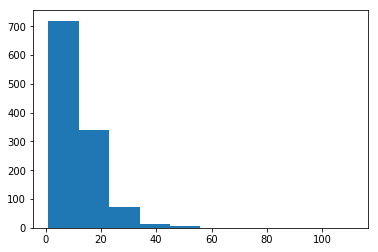

In [9]:
plt.hist(lens)

In [10]:
max_words = 2**12
batch_size = 512
max_len = 32

In [11]:
train = [" ".join(x["lemmas"]) for x in X_train]
test = [" ".join(x["lemmas"]) for x in X_test]

In [12]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train)

In [13]:
x_train = tokenizer.texts_to_sequences(train)
x_test = tokenizer.texts_to_sequences(test)

In [14]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [15]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

('x_train shape:', (4598, 32))
('x_test shape:', (1150, 32))


In [16]:
x_train

array([[   0,    0,    0, ..., 1237,    6, 2579],
       [   0,    0,    0, ...,   21,    1,  569],
       [   0,    0,    0, ...,   17,  123,  239],
       ...,
       [   0,    0,    0, ..., 1465,  109,   44],
       [   0,    0,    0, ...,  129,   54,  274],
       [   0,    0,    0, ...,  434,   48,  378]], dtype=int32)

In [17]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
num_classes = 5
y_train = keras.utils.to_categorical([y-1 for y in y_train], num_classes)
y_val = keras.utils.to_categorical([y-1 for y in y_test], num_classes)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
('y_train shape:', (4598, 5))
('y_val shape:', (1150, 5))


In [18]:
y_val

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [19]:
main_input = Input(shape=(max_len,), dtype='int32', name='main_input')
emb = Embedding(output_dim=128, input_dim=max_words, input_length=max_len)(main_input)
emb = SpatialDropout1D(0.1)(emb)

# tower_1 = Conv1D(64, 1, padding='same', activation='relu')(emb)
tower_1 = Conv1D(256, 3, padding='valid', activation='relu')(emb)
#tower_1 = LSTM(128)(tower_1)
tower_1 = SpatialDropout1D(0.1)(tower_1)
tower_1 = GlobalMaxPool1D()(tower_1)

# tower_2 = Conv1D(64, 1, padding='same', activation='relu')(emb)
tower_2 = Conv1D(256, 5, padding='valid', activation='relu')(emb)
#tower_2 = LSTM(128)(tower_2)
tower_2 = SpatialDropout1D(0.1)(tower_2)
tower_2 = GlobalMaxPool1D()(tower_2)

# tower_3 = MaxPool1D(3, padding='same')(emb)
tower_3 = Conv1D(256, 7, padding='valid', activation='relu')(emb)
#tower_3 = LSTM(128)(tower_3)
tower_3 = SpatialDropout1D(0.1)(tower_3)
tower_3 = GlobalMaxPool1D()(tower_3)

#aux_input = Input(shape=(50,), dtype='float', name='aux_input')
output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
# output = Dropout(0.1)(output)
#output = keras.layers.concatenate([output, aux_input], axis=1)
sm = Dense(num_classes, activation='softmax')(output)

model = Model(inputs=main_input, outputs=sm)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


In [20]:
model.layers

In [21]:
from keras.objectives import categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [22]:
epochs = 10

In [23]:
from keras.callbacks import TensorBoard  
tensorboard=TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
from keras.callbacks import EarlyStopping  
early_stopping=EarlyStopping(monitor='val_loss', patience=3)  


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])

Instructions for updating:
Use the retry module or similar alternatives.
Train on 4138 samples, validate on 460 samples
Epoch 1/10
4138/4138 [==============================] - 1s 248us/step - loss: 1.2457 - categorical_accuracy: 0.6890 - val_loss: 0.8204 - val_categorical_accuracy: 0.7717
Epoch 2/10
4138/4138 [==============================] - 0s 36us/step - loss: 0.8274 - categorical_accuracy: 0.7811 - val_loss: 0.7944 - val_categorical_accuracy: 0.7717
Epoch 3/10
4138/4138 [==============================] - 0s 36us/step - loss: 0.7474 - categorical_accuracy: 0.7811 - val_loss: 0.7685 - val_categorical_accuracy: 0.7717
Epoch 4/10
4138/4138 [==============================] - 0s 34us/step - loss: 0.7071 - categorical_accuracy: 0.7811 - val_loss: 0.7269 - val_categorical_accuracy: 0.7717
Epoch 5/10
4138/4138 [==============================] - 0s 35us/step - loss: 0.6537 - categorical_accuracy: 0.7815 - val_loss: 0.6833 - val_categorical_accuracy: 0.7739
Epoch 6/10
4138/4138 [============

In [24]:
from keras.callbacks import TensorBoard  
tensorboard=TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
from keras.callbacks import EarlyStopping  
early_stopping=EarlyStopping(monitor='val_loss', patience=3)  


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])

Train on 4138 samples, validate on 460 samples
Epoch 1/10
4138/4138 [==============================] - 0s 34us/step - loss: 0.2372 - categorical_accuracy: 0.9246 - val_loss: 0.6837 - val_categorical_accuracy: 0.7913
Epoch 2/10
4138/4138 [==============================] - 0s 35us/step - loss: 0.1895 - categorical_accuracy: 0.9456 - val_loss: 0.7224 - val_categorical_accuracy: 0.7783
Epoch 3/10
4138/4138 [==============================] - 0s 34us/step - loss: 0.1563 - categorical_accuracy: 0.9560 - val_loss: 0.7627 - val_categorical_accuracy: 0.7783
Epoch 4/10
4138/4138 [==============================] - 0s 35us/step - loss: 0.1269 - categorical_accuracy: 0.9671 - val_loss: 0.8151 - val_categorical_accuracy: 0.7826


In [25]:
score = model.evaluate(x_test, y_val, batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

1150/1150 [==============================] - 0s 18us/step


('Test score:', 0.6857468864192133)
('Test accuracy:', 0.7930434762913248)


In [26]:
results = model.predict(x_test, batch_size=batch_size, verbose=1)

1150/1150 [==============================] - 0s 52us/step


In [27]:
results = model.predict(x_test, batch_size=batch_size, verbose=1)

1150/1150 [==============================] - 0s 12us/step


In [28]:
print(classification_report(y_val, np.round(results), digits=3))

             precision    recall  f1-score   support

          0      0.414     0.203     0.273        59
          1      0.512     0.323     0.396       133
          2      0.854     0.908     0.880       901
          3      0.000     0.000     0.000         0
          4      0.652     0.263     0.375        57

avg / total      0.782     0.772     0.768      1150



/home/madrugado/Work/adr_detection_russian/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/madrugado/Work/adr_detection_russian/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [29]:
print(metrics.precision_score(y_val, np.round(results), average='macro'))
print(metrics.recall_score(y_val, np.round(results), average='macro'))
print(metrics.f1_score(y_val, np.round(results), average='macro'))

0.4863467982680296
0.3395472258214716
0.38481673413435197


/home/madrugado/Work/adr_detection_russian/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/madrugado/Work/adr_detection_russian/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/madrugado/Work/adr_detection_russian/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/madrugado/Work/adr_detection_russian/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 